## <center> Covid-19 Global Datasets - Exploratory Data Analysis 
    
The aim of this project is to perform exploratory data analysis (EDA) by analysing the data of countries effected by Covid-19.

We are interested to explore the following questions:
- (Q-1) Is the Delta variant of Covid-19 highly transmissible?
- (Q-2) Does it result in more deaths?
- (Q-3) What is the global trend of Covid-19 vaccinations?
- (Q-4) Is there any correlation between economic variables and the spread of Covid-19?
- (Q-5) What is the situation in Australia compared to countries with high vaccinations rate like Israel?
    
We will carry out the analysis using two datasets from [Our World in Data (OWID)](https://ourworldindata.org/). 
OWID is a scientific online publication that focuses on large global problems. The OWID datasets are comprehensive datasets and these datasets get updated daily.  

- Our World in Data - COVID-19 Dataset [Link](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv) 

- Our World in Data - Vaccinations Dataset [Link](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv) 
    

### Workflow
    
#### Part 1
- Import Libraries
- Create Functions
- Import Datasets 
    
#### Part 2
- Data Cleaning 
- Data Manipulation 
    
#### Part 3
- Exploratory Data Analysis and Visualisation
- Conclusion

# Part 1 

## Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

## Create Functions

In [2]:
# Read files from source
def read_file(url):
    r = requests.get(url).content
    r_file = pd.read_csv(io.StringIO(r.decode('utf-8')))
    return r_file

################################

# Look up country by name
def show_country(country_name):
    return total_cases.loc[total_cases['Country'] == country_name]

###############################

# Function to display total stats on a dashboard by country as input
def total_stats(country_name):
    x = total_merged_rename.copy()
    x = x.loc[x['Country'] == country_name]
    x['% Partially Vaccinated'] = (x['1st Dose'] / x['Population'])*100
    x['% Fully Vaccinated'] = (x['2nd Dose'] / x['Population'])*100
    x_new_cases = x[['New Cases']].sum()
    x_new_deaths = x[['New Deaths']].sum()
    x_total_cases = x[['Total Cases']].sum()
    x_total_deaths = x[['Total Deaths']].sum()
    x_1st_vax = x[['1st Dose']].sum()
    x_2nd_vax = x[['2nd Dose']].sum()
    x_part_vax = x[['% Partially Vaccinated']].sum()
    x_full_vax = x[['% Fully Vaccinated']].sum()
    x_vax_rate = x[['Vaccinations Rate']].sum()
    x_daily_vax = x[['Daily Vaccinations']].sum()

    fig = go.Figure()
    fig.update_layout(title= '{}: Covid-19 Statistics'.format(country_name))
    fig.add_trace(go.Indicator(
        mode='number', 
        value= int(x_new_cases), 
        number= {'valueformat': '0,f'}, 
        title= {'text': 'New Cases'},
        domain = {'row': 0, 'column': 0}))

    fig.add_trace(go.Indicator(
        mode='number', 
        value= int(x_new_deaths), 
        number= {'valueformat': '0,f'}, 
        title= {'text': 'New Lives Lost'},
        domain = {'row': 0, 'column': 1}))

    fig.add_trace(go.Indicator(
        mode='number', 
        value= int(x_total_cases), 
        number= {'valueformat': '0,f'}, 
        title= {'text': 'Total Cases'},
        domain = {'row': 2, 'column': 0}))

    fig.add_trace(go.Indicator(
        mode='number', 
        value= int(x_total_deaths), 
        number= {'valueformat': '0,f'}, 
        title= {'text': 'Total Mortality'},
        domain = {'row': 2, 'column': 1}))

    fig.add_trace(go.Indicator(
        mode='number', 
        value= int(x_1st_vax), 
        number= {'valueformat': '0,f'}, 
        title= {'text': 'Partially Vaccinated'},
        domain = {'row': 4, 'column': 0}))

    fig.add_trace(go.Indicator(
        
        mode='number', 
        value= float(x_part_vax), 
        number= {'valueformat': '0.2f'}, 
        title= {'text': 'Partially Vaccinated %'},
        domain = {'row': 4, 'column': 1}))

    fig.add_trace(go.Indicator(
        mode='number', 
        value= int(x_2nd_vax), 
        number= {'valueformat': '0,f'}, 
        title= {'text': 'Fully Vaccinated'},
        domain = {'row': 6, 'column': 0}))

    fig.add_trace(go.Indicator(
        mode='number', 
        value= float(x_full_vax), 
        number= {'valueformat': '0.2f'}, 
        title= {'text': 'Fully Vaccinated %'},
        domain = {'row': 6, 'column': 1}))
    
    fig.add_trace(go.Indicator(
        mode='number', 
        value= int(x_daily_vax), 
        number= {'valueformat': '0,f'}, 
        title= {'text': 'Daily Vaccinations'},
        domain = {'row': 8, 'column': 0}))
     
    fig.add_trace(go.Indicator(
        mode='number', 
        value= float(x_vax_rate), 
        number= {'valueformat': '0.2f'}, 
        title= {'text': 'Vaccinations Rate %'},
        domain = {'row': 8, 'column': 1}))

    fig.update_layout(grid={'rows': 10, 'columns': 2, 'pattern': 'independent'})
    fig.show()

###################################

# Create a single function to perform time-series analysis and 
# plot chart of cumulative data for ALL variable vs country at once
def plot_cumulative(country_name):
    fig = px.line(raw_data_rename[raw_data_rename['Country'] == country_name], 
    x = 'Date', y = 'New Cases', 
    title = '{}: Cumulative New Reported Cases'.format(country_name))
    fig.show()
    
    fig = px.line(raw_data_rename[raw_data_rename['Country'] == country_name], 
    x = 'Date', y = 'New Deaths', 
    title = '{}: Cumulative New Reported Mortality'.format(country_name))
    fig.show()
    
    fig = px.line(raw_data_rename[raw_data_rename['Country'] == country_name], 
    x = 'Date', y = 'Total Cases', 
    title = '{}: Cumulative Reported Total Cases'.format(country_name))
    fig.show()
    
    fig = px.line(raw_data_rename[raw_data_rename['Country'] == country_name], 
    x = 'Date', y = 'Total Deaths', 
    title = '{}: Cumulative Reported Total Mortality'.format(country_name))
    fig.show()

    fig = px.line(raw_vax_rename[raw_vax_rename['Country'] == country_name], 
    x = 'Date', y = 'Daily Vaccinations', 
    title = '{}: Cumulative Reported Daily Vaccinations'.format(country_name))
    fig.show()
    
    fig = px.line(raw_vax_rename[raw_vax_rename['Country'] == country_name], 
    x= 'Date', y = 'Vaccinations Rate', 
    title = '{}: Cumulative Vaccinations Rate'.format(country_name))
    fig.show()

    fig = px.line(raw_vax_rename[raw_vax_rename['Country'] == country_name], 
    x = 'Date', y = 'Total Vaccinations', 
    title = '{}: Cumulative Reported Total Vaccinations'.format(country_name))
    fig.show()

    fig = px.line(raw_vax_rename[raw_vax_rename['Country'] == country_name], 
    x= 'Date', y = '1st Dose', 
    title = '{}: Cumulative Reported First Dose Vaccinations'.format(country_name))
    fig.show()
    
    fig = px.line(raw_vax_rename[raw_vax_rename['Country'] == country_name], 
    x = 'Date', y = '2nd Dose', 
    title = '{}: Cumulative Reported 2nd Dose Vaccinations'.format(country_name))
    fig.show()
    
    fig = px.line(raw_vax_rename[raw_vax_rename['Country'] == country_name], 
    x = 'Date', y = 'Total Boosters', 
    title = '{}: Cumulative Reported Vaccine Booster'.format(country_name))
    fig.show()

## Import and Read files 

### 1- OWID COVID-19 - Dataset

In [3]:
#Read file
raw_data = read_file('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
raw_data

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
136024      ZWE    Africa     Zimbabwe  2021-11-22     133674.0       27.0   
136025      ZWE    Africa     Zimbabwe  2021-11-23     133674.0        0.0   
136026      ZWE    Africa     Zimbabwe  2021-11-24     133747.0       73.0   
136027      ZWE    Africa     Zimbabwe  2021-11-25     133774.0       27.0   
136028      ZWE    Africa     Zimbabwe  2021-11-26     133836.0       62.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
136024              33.714        4699.0         0.0                0.286   
136025              24.143        4699.0         0.0                0.143   
136026              27.143        4703.0         4.0                0.571   
136027              25.857        4704.0         1.0                0.714   
136028              34.714        4704.0         0.0                0.714   

        total_cases_per_million  new_cases_per_million  \
0                         0.126                  0.126   
1                         0.126                  0.000   
2                         0.126                  0.000   
3                         0.126                  0.000   
4                         0.126                  0.000   
...                         ...                    ...   
136024                 8857.175                  1.789   
136025                 8857.175                  0.000   
136026                 8862.012                  4.837   
136027                 8863.801                  1.789   
136028                 8867.909                  4.108   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
136024                           2.234                   311.353   
136025                           1.600                   311.353   
136026                           1.798                   311.619   
136027                           1.713                   311.685   
136028                           2.300                   311.685   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
136024                   0.000                            0.019   
136025                   0.000                            0.009   
136026                   0.2

In [4]:
#Display info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136029 entries, 0 to 136028
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    136029 non-null  object 
 1   continent                                   127360 non-null  object 
 2   location                                    136029 non-null  object 
 3   date                                        136029 non-null  object 
 4   total_cases                                 128515 non-null  float64
 5   new_cases                                   128510 non-null  float64
 6   new_cases_smoothed                          127470 non-null  float64
 7   total_deaths                                117278 non-null  float64
 8   new_deaths                                  117474 non-null  float64
 9   new_deaths_smoothed                         127470 non-null  float64
 

In [5]:
#Inpsect null values 
raw_data.isnull().sum()

iso_code                                        0
continent                                    8669
location                                        0
date                                            0
total_cases                                  7514
                                            ...  
human_development_index                     18418
excess_mortality_cumulative_absolute       131245
excess_mortality_cumulative                131245
excess_mortality                           131245
excess_mortality_cumulative_per_million    131245
Length: 67, dtype: int64

#### Observation
-	The OWID dataset consist of over 64 columns 119,000 rows and growing, as it continues to be modified. 
-	Majority of the data type is float and some are strings.
-	Looking at columns with null values, we can see that there is a significant amount of null in many important columns needed for this analysis such as vaccinations columns. 
-	This will impact on our analysis especially when we want to examine the rate of vaccination per country and the rate of 1st and 2nd doses of Covid vaccine. 
-	As this data is missing important values, we will input a separate vaccination data set in which we will clean and later merge together. 


### 2- OWID Vaccinations - Dataset

In [6]:
#Read file
raw_vax = read_file('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
raw_vax

location iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
64158     Zimbabwe      ZWE  2021-11-20           6396012.0   
64159     Zimbabwe      ZWE  2021-11-21           6419704.0   
64160     Zimbabwe      ZWE  2021-11-22           6433842.0   
64161     Zimbabwe      ZWE  2021-11-23           6454719.0   
64162     Zimbabwe      ZWE  2021-11-24           6486873.0   

       people_vaccinated  people_fully_vaccinated  total_boosters  \
0                    0.0                      NaN             NaN   
1                    NaN                      NaN             NaN   
2                    NaN                      NaN             NaN   
3                    NaN                      NaN             NaN   
4                    NaN                      NaN             NaN   
...                  ...                      ...             ...   
64158          3651820.0                2744192.0             NaN   
64159          3672011.0                2747693.0             NaN   
64160          3681490.0                2752352.0             NaN   
64161          3697233.0                2757486.0             NaN   
64162          3719630.0                2767243.0             NaN   

       daily_vaccinations_raw  daily_vaccinations  \
0                         NaN                 NaN   
1                         NaN              1367.0   
2                         NaN              1367.0   
3                         NaN              1367.0   
4                         NaN              1367.0   
...                       ...                 ...   
64158                 33513.0             34377.0   
64159                 23692.0             36284.0   
64160                 14138.0             34791.0   
64161                 20877.0             32371.0   
64162                 32154.0             31085.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
64158                           42.38                          24.20   
64159                           42.54                          24.33   
64160                           42.63                          24.39   
64161                           42.77                          24.50   
64162                           42.98                          24.65   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                                      NaN                         NaN   
1                                      NaN                         NaN   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                         NaN   
...                                    ...                         ...   
64158                                18.18                         NaN   
64159                                18.21                         NaN   
64160                                18.24                         NaN   
64161                                18.27                         NaN   
64162                                18.34                         NaN   

       daily_vaccinations_per_mil

In [7]:
#Display info
raw_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64163 entries, 0 to 64162
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             64163 non-null  object 
 1   iso_code                             64163 non-null  object 
 2   date                                 64163 non-null  object 
 3   total_vaccinations                   36178 non-null  float64
 4   people_vaccinated                    34609 non-null  float64
 5   people_fully_vaccinated              31645 non-null  float64
 6   total_boosters                       7774 non-null   float64
 7   daily_vaccinations_raw               30245 non-null  float64
 8   daily_vaccinations                   63819 non-null  float64
 9   total_vaccinations_per_hundred       36178 non-null  float64
 10  people_vaccinated_per_hundred        34609 non-null  float64
 11  people_fully_vaccinated_per_

In [8]:
#Inspect null value
raw_vax.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27985
people_vaccinated                      29554
people_fully_vaccinated                32518
total_boosters                         56389
daily_vaccinations_raw                 33918
daily_vaccinations                       344
total_vaccinations_per_hundred         27985
people_vaccinated_per_hundred          29554
people_fully_vaccinated_per_hundred    32518
total_boosters_per_hundred             56389
daily_vaccinations_per_million           344
daily_people_vaccinated                 1527
daily_people_vaccinated_per_hundred     1527
dtype: int64

#### Observation
- The OWID vaccinations dataset consist of 14 columns and over 50,000 rows and 14 columns and growing as it continues to be modified.
- Majority of the data type is float and few object strings.
- Looking at columns with null values, we can see that there are null values present in this dataset.
- Also, as we are going to be merging this dataframe with raw_data dataframe. From a quick observation I can see that the location columns in raw_data dataframe can act as a key to match the dataset with vax_raw location column. We will rename the location column : 'Country' before the merge.   

# Part 2 - Data Cleaning and Manipulation

### 1- OWID COVID-19 - Dataset

#### Drop unwanted rows and columns 

The raw_data file consist of rows relating to data per continent, as the aim of this analysis to look at an overview of countries, I decided to drop these rows below.
Next, I will remove unwanted columns.

In [9]:
# Remove unwanted rows
raw_data = raw_data[raw_data.iso_code != 'OWID_AFR']
raw_data = raw_data[raw_data.iso_code != 'OWID_ASI']
raw_data = raw_data[raw_data.iso_code != 'OWID_EUR']
raw_data = raw_data[raw_data.iso_code != 'OWID_EUN']
raw_data = raw_data[raw_data.iso_code != 'OWID_INT']
raw_data = raw_data[raw_data.iso_code != 'OWID_NAM']
raw_data = raw_data[raw_data.iso_code != 'OWID_OCE']
raw_data = raw_data[raw_data.iso_code != 'OWID_SAM']
raw_data = raw_data[raw_data.iso_code != 'OWID_WRL']
raw_data = raw_data[raw_data.location != 'Lower middle income']
raw_data = raw_data[raw_data.location != 'High income']
raw_data = raw_data[raw_data.location != 'Upper middle income']

In [10]:
# Remove unwanted columns 
raw_data_drop = raw_data.drop(columns = ['iso_code', 'continent', 'new_cases_smoothed', 'new_deaths_smoothed', 
            'reproduction_rate', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 
            'new_deaths_smoothed_per_million','new_cases_smoothed_per_million', 'new_tests_smoothed',
            'new_tests_smoothed_per_thousand', 'total_vaccinations','people_vaccinated','people_fully_vaccinated',
            'total_boosters', 'new_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
            'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred','icu_patients', 'icu_patients_per_million', 
            'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 
            'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests','total_tests',
            'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate', 'tests_per_case',
            'excess_mortality_cumulative', 'excess_mortality','tests_units', 'female_smokers', 'male_smokers',
            'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'excess_mortality_cumulative_absolute',
            'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'excess_mortality_cumulative_per_million'])
                                                                               
raw_data_drop.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence',
       'human_development_index'],
      dtype='object')

#### Rename Columns

In [11]:
#human_development_index = HDI
#gdp_per_capita = GDP
#diabetes_prevalence = Diabetes prev
raw_data_rename = raw_data_drop.rename(columns={'location': 'Country', 'date': 'Date',
                            'total_cases': 'Total Cases','new_cases': 'New Cases', 'new_deaths': 'New Deaths', 'total_deaths': 'Total Deaths',  
                            'total_cases_per_million': 'Total Cases per million','total_deaths_per_million': 'Total Deaths per million',
                            'new_deaths_per_million': 'New Deaths per million ',                    
                            'new_cases_per_million': 'New Cases per million',
                            'stringency_index': 'Stringency Index','population': 'Population', 
                            'population_density': 'Population Density','median_age': 'Median Age',
                            'aged_65_older': '65 or Older', 'aged_70_older': '70 or Older',
                            'gdp_per_capita': 'GDP', 'human_development_index': 'HDI', 'extreme_poverty': 'Extreme Poverty', 'cardiovasc_death_rate': 'Cardiovasc Death Rate',
                            'diabetes_prevalence': 'Diabetes Prev'})                                                 
                                                     

In [12]:
raw_data_rename.head()

Country        Date  Total Cases  New Cases  Total Deaths  New Deaths  \
0  Afghanistan  2020-02-24          5.0        5.0           NaN         NaN   
1  Afghanistan  2020-02-25          5.0        0.0           NaN         NaN   
2  Afghanistan  2020-02-26          5.0        0.0           NaN         NaN   
3  Afghanistan  2020-02-27          5.0        0.0           NaN         NaN   
4  Afghanistan  2020-02-28          5.0        0.0           NaN         NaN   

   Total Cases per million  New Cases per million  Total Deaths per million  \
0                    0.126                  0.126                       NaN   
1                    0.126                  0.000                       NaN   
2                    0.126                  0.000                       NaN   
3                    0.126                  0.000                       NaN   
4                    0.126                  0.000                       NaN   

   New Deaths per million   Stringency Index  Population  Population Density  \
0                      NaN              8.33  39835428.0              54.422   
1                      NaN              8.33  39835428.0              54.422   
2                      NaN              8.33  39835428.0              54.422   
3                      NaN              8.33  39835428.0              54.422   
4                      NaN              8.33  39835428.0              54.422   

   Median Age  65 or Older  70 or Older       GDP  Extreme Poverty  \
0        18.6        2.581        1.337  1803.987              NaN   
1        18.6        2.581        1.337  1803.987              NaN   
2        18.6        2.581        1.337  1803.987              NaN   
3        18.6        2.581        1.337  1803.987              NaN   
4        18.6        2.581        1.337  1803.987              NaN   

   Cardiovasc Death Rate  Diabetes Prev    HDI  
0                597.029           9.59  0.511  
1                597.029           9.59  0.511  
2                597.029           9.59  0.511  
3                597.029           9.59  0.511  
4                597.029           9.59  0.511

#### Fill missing value

In [13]:
# drop all NaN and repalce with (0)
raw_data_rename.fillna(0, inplace = True)

In [14]:
raw_data_rename.sample(10)

Country        Date  Total Cases  New Cases  Total Deaths  \
111541        Somalia  2020-08-22       3269.0        4.0          93.0   
59758     Isle of Man  2021-07-11          0.0        0.0           0.0   
112135   South Africa  2020-06-18      83890.0     3478.0        1737.0   
93912        Pakistan  2021-02-07     555511.0     1037.0       12026.0   
106142   Saudi Arabia  2021-06-23     478135.0     1253.0        7716.0   
124887         Turkey  2021-04-03    3445052.0    44756.0       32078.0   
50648   Guinea-Bissau  2020-05-15        913.0        0.0           3.0   
17867          Brunei  2020-07-05        141.0        0.0           3.0   
54710         Hungary  2020-12-12     276247.0     5047.0        6784.0   
71684       Lithuania  2021-10-26     392425.0     2394.0        5693.0   

        New Deaths  Total Cases per million  New Cases per million  \
111541         0.0                  199.823                  0.245   
59758          0.0                    0.000                  0.000   
112135        63.0                 1397.189                 57.926   
93912         59.0                 2466.746                  4.605   
106142        13.0                13529.310                 35.455   
124887       186.0                40509.656                526.277   
50648          0.0                  452.992                  0.000   
17867          0.0                  319.343                  0.000   
54710        162.0                28673.693                523.865   
71684         32.0               145890.384                890.008   

        Total Deaths per million  New Deaths per million   Stringency Index  \
111541                     5.685                    0.000             17.59   
59758                      0.000                    0.000              0.00   
112135                    28.930                    1.049             76.85   
93912                     53.401                    0.262             50.46   
106142                   218.332                    0.368             53.70   
124887                   377.199                    2.187             72.22   
50648                      1.488                    0.000              0.00   
17867                      6.795                    0.000             49.07   
54710                    704.161                   16.815             72.22   
71684                   2116.465                   11.897             46.30   

         Population  Population Density  Median Age  65 or Older  70 or Older  \
111541   16359500.0              23.500        16.8        2.731        1.496   
59758       85410.0             147.872         0.0        0.000        0.000   
112135   60041996.0              46.754        27.3        5.344        3.053   
93912   225199929.0             255.573        23.5        4.495        2.780   
106142   35340680.0              15.322        31.9        3.295        1.845   
124887   85042736.0             104.914        31.6        8.153        5.061   
50648     2015490.0              66.191        19.4        3.002        1.565   
17867      441532.0              81.347        32.4        4.591        2.382   
54710     9634162.0             108.043        43.4       18.577       11.976   
71684     2689862.0              45.135        43.5       19.002       13.778   

              GDP  Extreme Poverty  Cardiovasc Death Rate  Diabetes Prev  \
111541      0.000              0.0                365.769           6.05   
59758       0.000              0.0                  0.000           0.00   
112135  12294.876             18.9                200.380           5.52   
93912    5034.708              4.0                423.031           8.35   
106142  49045.411              0.0                259.538          17.72   
124887  25129.341              0.2                171.285          12.13   
50648    1548.675             67.1                382.474           2.42   
17867   71809.251              0.0             

#### Convert Date to datetime 

In [15]:
# Convert date from str object to datetime
raw_data_rename['Date'] = pd.to_datetime(raw_data_rename['Date']) 

#### Combine into Data Structure

In [16]:
# Sort values by date, then groupby and aggregate then sum date and country,
# then groupby and aggregate by country and last() date input, reset index and drop duplicates 
raw_data_rename.sort_values(by = 'Date', inplace = True) #sort values by date

raw_data_sort = raw_data_rename.groupby(['Date', 'Country'],as_index = False).sum().groupby(['Country']).last().reset_index().drop_duplicates()
raw_data_sort.head(5)

Country       Date  Total Cases  New Cases  Total Deaths  New Deaths  \
0  Afghanistan 2021-11-26     157171.0       27.0        7307.0         0.0   
1      Albania 2021-11-26     198732.0      440.0        3077.0         9.0   
2      Algeria 2021-11-26     209817.0      193.0        6046.0         5.0   
3      Andorra 2021-11-26      16712.0      146.0         131.0         0.0   
4       Angola 2021-11-26      65130.0       25.0        1733.0         1.0   

   Total Cases per million  New Cases per million  Total Deaths per million  \
0                 3945.508                  0.678                   183.430   
1                69173.883                153.154                  1071.031   
2                 4702.664                  4.326                   135.510   
3               216045.712               1887.427                  1693.513   
4                 1919.336                  0.737                    51.070   

   New Deaths per million   Stringency Index  Population  Population Density  \
0                    0.000               0.0  39835428.0              54.422   
1                    3.133               0.0   2872934.0             104.871   
2                    0.112               0.0  44616626.0              17.348   
3                    0.000               0.0     77354.0             163.755   
4                    0.029               0.0  33933611.0              23.890   

   Median Age  65 or Older  70 or Older        GDP  Extreme Poverty  \
0        18.6        2.581        1.337   1803.987              0.0   
1        38.0       13.188        8.643  11803.431              1.1   
2        29.1        6.211        3.857  13913.839              0.5   
3         0.0        0.000        0.000      0.000              0.0   
4        16.8        2.405        1.362   5819.495              0.0   

   Cardiovasc Death Rate  Diabetes Prev    HDI  
0                597.029           9.59  0.511  
1                304.195          10.08  0.795  
2                278.364           6.73  0.748  
3                109.135           7.97  0.868  
4                276.045           3.94  0.581

### 2- OWID  Vaccinations - Dataset 

#### Drop unwanted rows and columns 

Similar to raw_data df, The raw_vax df consist of rows relating to data per continent, as the aim of this analysis to look at an overview of countries, I decided to drop these rows below.
Next, I will remove unwanted columns.

In [17]:
# Remove unwanted rows
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_AFR']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_EUR']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_EUN']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_INT']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_HIC']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_LIC']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_LMC']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_NAM']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_OCE']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_SAM']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_SAM']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_UMC']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_WRL']
raw_vax = raw_vax[raw_vax.iso_code != 'OWID_ASI']
raw_vax.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                             0.0   
1              1367.0                             NaN   
2              1367.0                             NaN   
3              1367.0                             NaN   
4              1367.0                             NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                            0.0                                  NaN   
1                            NaN                                  NaN   
2                            NaN                                  NaN   
3                            NaN                                  NaN   
4                            NaN                                  NaN   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         NaN                             NaN   
1                         NaN                            34.0   
2                         NaN                            34.0   
3                         NaN                            34.0   
4                         NaN                            34.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  
0                      NaN                                  NaN  
1                   1367.0                                0.003  
2                   1367.0                                0.003  
3                   1367.0                                0.003  
4                   1367.0                                0.003

#### Drop Columns

In [18]:
# Drop unwanted columns 
raw_vax_drop = raw_vax.drop(columns = ['iso_code','daily_vaccinations_raw', 
            'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
            'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 
            'daily_vaccinations_per_million','daily_people_vaccinated', 'daily_people_vaccinated_per_hundred'])

#### Rename Columns

In [19]:
# Rename columns 
raw_vax_rename = raw_vax_drop.rename(columns={'location': 'Country','date': 'Date', 'total_vaccinations': 'Total Vaccinations',
       'people_vaccinated': '1st Dose', 'people_fully_vaccinated': '2nd Dose', 'total_boosters': 'Total Boosters',
       'daily_vaccinations': 'Daily Vaccinations'})
raw_vax_rename.head()

Country        Date  Total Vaccinations  1st Dose  2nd Dose  \
0  Afghanistan  2021-02-22                 0.0       0.0       NaN   
1  Afghanistan  2021-02-23                 NaN       NaN       NaN   
2  Afghanistan  2021-02-24                 NaN       NaN       NaN   
3  Afghanistan  2021-02-25                 NaN       NaN       NaN   
4  Afghanistan  2021-02-26                 NaN       NaN       NaN   

   Total Boosters  Daily Vaccinations  
0             NaN                 NaN  
1             NaN              1367.0  
2             NaN              1367.0  
3             NaN              1367.0  
4             NaN              1367.0

#### Convert Date to datetime, Total Vaccinations and Daily Vaccinations to float

In [20]:
# Convert Date from str object to datetime
raw_vax_rename['Date'] = pd.to_datetime(raw_vax_rename['Date'])

In [21]:
# Covert str objects to float 
raw_vax_rename['Total Vaccinations'] = pd.to_numeric(raw_vax_rename['Total Vaccinations'], downcast= 'float')
raw_vax_rename['Daily Vaccinations'] = pd.to_numeric(raw_vax_rename['Daily Vaccinations'], downcast= 'float')

In [22]:
raw_vax_rename.dtypes

Country                       object
Date                  datetime64[ns]
Total Vaccinations           float32
1st Dose                     float64
2nd Dose                     float64
Total Boosters               float64
Daily Vaccinations           float32
dtype: object

In [23]:
# Create a columns for Vaccinations Rate for time-series analysis
raw_vax_rename['Vaccinations Rate'] = raw_vax_rename['Daily Vaccinations']/raw_vax_rename['Total Vaccinations']*100
raw_vax_rename.head()

Country       Date  Total Vaccinations  1st Dose  2nd Dose  \
0  Afghanistan 2021-02-22                 0.0       0.0       NaN   
1  Afghanistan 2021-02-23                 NaN       NaN       NaN   
2  Afghanistan 2021-02-24                 NaN       NaN       NaN   
3  Afghanistan 2021-02-25                 NaN       NaN       NaN   
4  Afghanistan 2021-02-26                 NaN       NaN       NaN   

   Total Boosters  Daily Vaccinations  Vaccinations Rate  
0             NaN                 NaN                NaN  
1             NaN              1367.0                NaN  
2             NaN              1367.0                NaN  
3             NaN              1367.0                NaN  
4             NaN              1367.0                NaN

In [24]:
raw_vax_rename.fillna(0, inplace = True)
raw_vax_rename.head()

Country       Date  Total Vaccinations  1st Dose  2nd Dose  \
0  Afghanistan 2021-02-22                 0.0       0.0       0.0   
1  Afghanistan 2021-02-23                 0.0       0.0       0.0   
2  Afghanistan 2021-02-24                 0.0       0.0       0.0   
3  Afghanistan 2021-02-25                 0.0       0.0       0.0   
4  Afghanistan 2021-02-26                 0.0       0.0       0.0   

   Total Boosters  Daily Vaccinations  Vaccinations Rate  
0             0.0                 0.0                0.0  
1             0.0              1367.0                0.0  
2             0.0              1367.0                0.0  
3             0.0              1367.0                0.0  
4             0.0              1367.0                0.0

#### Combine into Data Structure

In [25]:
# Sort values by date, then groupby and aggregate then sum date and country,
# then groupby and aggregate by country and last() date input, reset index and drop duplicates 
raw_vax_rename.sort_values(by = 'Date', inplace = True)
raw_vax_sort = raw_vax_rename.groupby(['Date', 'Country'],as_index = False).sum().groupby(['Country']).last().reset_index().drop_duplicates()

In [26]:
raw_data_sort.head()

Country       Date  Total Cases  New Cases  Total Deaths  New Deaths  \
0  Afghanistan 2021-11-26     157171.0       27.0        7307.0         0.0   
1      Albania 2021-11-26     198732.0      440.0        3077.0         9.0   
2      Algeria 2021-11-26     209817.0      193.0        6046.0         5.0   
3      Andorra 2021-11-26      16712.0      146.0         131.0         0.0   
4       Angola 2021-11-26      65130.0       25.0        1733.0         1.0   

   Total Cases per million  New Cases per million  Total Deaths per million  \
0                 3945.508                  0.678                   183.430   
1                69173.883                153.154                  1071.031   
2                 4702.664                  4.326                   135.510   
3               216045.712               1887.427                  1693.513   
4                 1919.336                  0.737                    51.070   

   New Deaths per million   Stringency Index  Population  Population Density  \
0                    0.000               0.0  39835428.0              54.422   
1                    3.133               0.0   2872934.0             104.871   
2                    0.112               0.0  44616626.0              17.348   
3                    0.000               0.0     77354.0             163.755   
4                    0.029               0.0  33933611.0              23.890   

   Median Age  65 or Older  70 or Older        GDP  Extreme Poverty  \
0        18.6        2.581        1.337   1803.987              0.0   
1        38.0       13.188        8.643  11803.431              1.1   
2        29.1        6.211        3.857  13913.839              0.5   
3         0.0        0.000        0.000      0.000              0.0   
4        16.8        2.405        1.362   5819.495              0.0   

   Cardiovasc Death Rate  Diabetes Prev    HDI  
0                597.029           9.59  0.511  
1                304.195          10.08  0.795  
2                278.364           6.73  0.748  
3                109.135           7.97  0.868  
4                276.045           3.94  0.581

In [27]:
raw_vax_sort.head()

Country       Date  Total Vaccinations   1st Dose   2nd Dose  \
0  Afghanistan 2021-11-20           5116767.0  4285440.0  3454113.0   
1      Albania 2021-11-25           2081782.0  1067769.0   953489.0   
2      Algeria 2021-11-22          12032500.0  6703364.0  5314016.0   
3      Andorra 2021-10-31            104534.0    54999.0    49535.0   
4       Angola 2021-11-24           9026310.0  6266044.0  2760266.0   

   Total Boosters  Daily Vaccinations  Vaccinations Rate  
0             0.0            162172.0           3.169423  
1         60524.0              6859.0           0.329477  
2             0.0             71092.0           0.590833  
3             0.0                66.0           0.063137  
4             0.0            122159.0           1.353366

## Merge both datasets together

#### Observation
So far, we have two cleaned datasets:
- raw_data_sort (OWID covid19 dataset)
- raw_vax_sort (OWID Vaccination dataset)

Next, we will perform a merge using the pd.merg function. The merge will use 'Country' as a key between both datasets.

In [28]:
# Create a copy of each file then perform pd.merge
raw_data = raw_data_sort.copy()
raw_vax = raw_vax_sort.copy()
total_merged = pd.merge(raw_data, raw_vax,left_on = 'Country', right_on= 'Country', how = 'left')

In [29]:
total_merged.head()

Country     Date_x  Total Cases  New Cases  Total Deaths  New Deaths  \
0  Afghanistan 2021-11-26     157171.0       27.0        7307.0         0.0   
1      Albania 2021-11-26     198732.0      440.0        3077.0         9.0   
2      Algeria 2021-11-26     209817.0      193.0        6046.0         5.0   
3      Andorra 2021-11-26      16712.0      146.0         131.0         0.0   
4       Angola 2021-11-26      65130.0       25.0        1733.0         1.0   

   Total Cases per million  New Cases per million  Total Deaths per million  \
0                 3945.508                  0.678                   183.430   
1                69173.883                153.154                  1071.031   
2                 4702.664                  4.326                   135.510   
3               216045.712               1887.427                  1693.513   
4                 1919.336                  0.737                    51.070   

   New Deaths per million   Stringency Index  Population  Population Density  \
0                    0.000               0.0  39835428.0              54.422   
1                    3.133               0.0   2872934.0             104.871   
2                    0.112               0.0  44616626.0              17.348   
3                    0.000               0.0     77354.0             163.755   
4                    0.029               0.0  33933611.0              23.890   

   Median Age  65 or Older  70 or Older        GDP  Extreme Poverty  \
0        18.6        2.581        1.337   1803.987              0.0   
1        38.0       13.188        8.643  11803.431              1.1   
2        29.1        6.211        3.857  13913.839              0.5   
3         0.0        0.000        0.000      0.000              0.0   
4        16.8        2.405        1.362   5819.495              0.0   

   Cardiovasc Death Rate  Diabetes Prev    HDI     Date_y  Total Vaccinations  \
0                597.029           9.59  0.511 2021-11-20           5116767.0   
1                304.195          10.08  0.795 2021-11-25           2081782.0   
2                278.364           6.73  0.748 2021-11-22          12032500.0   
3                109.135           7.97  0.868 2021-10-31            104534.0   
4                276.045           3.94  0.581 2021-11-24           9026310.0   

    1st Dose   2nd Dose  Total Boosters  Daily Vaccinations  Vaccinations Rate  
0  4285440.0  3454113.0             0.0            162172.0           3.169423  
1  1067769.0   953489.0         60524.0              6859.0           0.329477  
2  6703364.0  5314016.0             0.0             71092.0           0.590833  
3    54999.0    49535.0             0.0                66.0           0.063137  
4  6266044.0  2760266.0             0.0            122159.0           1.353366

#### Drop and Rename Date column

In [30]:
# Rename new columns
total_merged_rename = total_merged.rename(columns={'Date_x': 'Date'})  
total_merged_rename.drop(columns = ['Date_y'], inplace = True)

In [31]:
total_merged_rename

Country       Date  Total Cases  New Cases  Total Deaths  \
0          Afghanistan 2021-11-26     157171.0       27.0        7307.0   
1              Albania 2021-11-26     198732.0      440.0        3077.0   
2              Algeria 2021-11-26     209817.0      193.0        6046.0   
3              Andorra 2021-11-26      16712.0      146.0         131.0   
4               Angola 2021-11-26      65130.0       25.0        1733.0   
..                 ...        ...          ...        ...           ...   
220            Vietnam 2021-11-26    1181337.0    13109.0       24544.0   
221  Wallis and Futuna 2021-11-22          0.0        0.0           0.0   
222              Yemen 2021-11-26       9979.0        2.0        1943.0   
223             Zambia 2021-11-26     210118.0        6.0        3667.0   
224           Zimbabwe 2021-11-26     133836.0       62.0        4704.0   

     New Deaths  Total Cases per million  New Cases per million  \
0           0.0                 3945.508                  0.678   
1           9.0                69173.883                153.154   
2           5.0                 4702.664                  4.326   
3           0.0               216045.712               1887.427   
4           1.0                 1919.336                  0.737   
..          ...                      ...                    ...   
220       137.0                12033.728                133.535   
221         0.0                    0.000                  0.000   
222         0.0                  327.281                  0.066   
223         0.0                11105.217                  0.317   
224         0.0                 8867.909                  4.108   

     Total Deaths per million  New Deaths per million   Stringency Index  \
0                     183.430                    0.000               0.0   
1                    1071.031                    3.133               0.0   
2                     135.510                    0.112               0.0   
3                    1693.513                    0.000               0.0   
4                      51.070                    0.029               0.0   
..                        ...                      ...               ...   
220                   250.018                    1.396               0.0   
221                     0.000                    0.000               0.0   
222                    63.724                    0.000               0.0   
223                   193.809                    0.000               0.0   
224                   311.685                    0.000               0.0   

     Population  Population Density  Median Age  65 or Older  70 or Older  \
0    39835428.0              54.422        18.6        2.581        1.337   
1     2872934.0             104.871        38.0       13.188        8.643   
2    44616626.0              17.348        29.1        6.211        3.857   
3       77354.0             163.755         0.0        0.000        0.000   
4    33933611.0              23.890        16.8        2.405        1.362   
..          ...                 ...         ...          ...          ...   
220  98168829.0             308.127        32.6        7.150        4.718   
221     11094.0               0.000         0.0        0.000        0.000   
222  30490639.0              53.508        20.3        2.922        1.583   
223  18920657.0              22.995        17.7        2.480        1.542   
224  15092171.0              42.729        19.6        2.822        1.882   

           GDP  Extreme Poverty  Cardiovasc Death Rate  Diabetes Prev    HDI  \
0     1803.987              0.0                597.029           9.59  0.511   
1    11803.431              1.1                304.195          10.08  0.795   
2    13913.839              0.5                278.364           6.73  0.748   
3        0.000              0.0                109.135           7.97  0.868   
4     5819.495              0.0                276.045           3.94  

#### Observation
-	We have successfully merged both dataframes together and matched the date with the related country column. In total we have 27 columns 233 rows and over 233 columns.
-	Finally, we performed random checks of values in  total vaccination, 1st dose and 2nd dose data per country against current reported values and were satisfied that the information we have is accurate. It is also important to note, for example vaccination data for China contained the total vaccinations and it is missing 1st does and 2nd dose information, this may result in inaccurate visual representations.

### Create new columns 

In this section we will create new columns to provide us with more insights:
- Total Recovered 
- Recovered Rate
- Death Rate   
- % Partially Vaccinated
- % Fully Vaccinated

In [32]:
# Make a copy of df
total_cases = total_merged_rename.copy() 

# Create new columns 
total_cases['Total Recovered'] = total_cases['Total Cases'] - total_cases['Total Deaths']
total_cases['Recovered Rate'] = (total_cases['Total Recovered'] / total_cases['Total Cases'])*100

total_cases['Death Rate'] = (total_cases['Total Deaths'] / total_cases['Total Cases'])*100

total_cases['% Partially Vaccinated'] = (total_cases['1st Dose'] / total_cases['Population'])*100
total_cases['% Fully Vaccinated'] = (total_cases['2nd Dose'] / total_cases['Population'])*100

In [33]:
total_cases.head()

Country       Date  Total Cases  New Cases  Total Deaths  New Deaths  \
0  Afghanistan 2021-11-26     157171.0       27.0        7307.0         0.0   
1      Albania 2021-11-26     198732.0      440.0        3077.0         9.0   
2      Algeria 2021-11-26     209817.0      193.0        6046.0         5.0   
3      Andorra 2021-11-26      16712.0      146.0         131.0         0.0   
4       Angola 2021-11-26      65130.0       25.0        1733.0         1.0   

   Total Cases per million  New Cases per million  Total Deaths per million  \
0                 3945.508                  0.678                   183.430   
1                69173.883                153.154                  1071.031   
2                 4702.664                  4.326                   135.510   
3               216045.712               1887.427                  1693.513   
4                 1919.336                  0.737                    51.070   

   New Deaths per million   Stringency Index  Population  Population Density  \
0                    0.000               0.0  39835428.0              54.422   
1                    3.133               0.0   2872934.0             104.871   
2                    0.112               0.0  44616626.0              17.348   
3                    0.000               0.0     77354.0             163.755   
4                    0.029               0.0  33933611.0              23.890   

   Median Age  65 or Older  70 or Older        GDP  Extreme Poverty  \
0        18.6        2.581        1.337   1803.987              0.0   
1        38.0       13.188        8.643  11803.431              1.1   
2        29.1        6.211        3.857  13913.839              0.5   
3         0.0        0.000        0.000      0.000              0.0   
4        16.8        2.405        1.362   5819.495              0.0   

   Cardiovasc Death Rate  Diabetes Prev    HDI  Total Vaccinations   1st Dose  \
0                597.029           9.59  0.511           5116767.0  4285440.0   
1                304.195          10.08  0.795           2081782.0  1067769.0   
2                278.364           6.73  0.748          12032500.0  6703364.0   
3                109.135           7.97  0.868            104534.0    54999.0   
4                276.045           3.94  0.581           9026310.0  6266044.0   

    2nd Dose  Total Boosters  Daily Vaccinations  Vaccinations Rate  \
0  3454113.0             0.0            162172.0           3.169423   
1   953489.0         60524.0              6859.0           0.329477   
2  5314016.0             0.0             71092.0           0.590833   
3    49535.0             0.0                66.0           0.063137   
4  2760266.0             0.0            122159.0           1.353366   

   Total Recovered  Recovered Rate  Death Rate  % Partially Vaccinated  \
0         149864.0       95.350924    4.649076               10.757861   
1         195655.0       98.451684    1.548316               37.166499   
2         203771.0       97.118441    2.881559               15.024363   
3          16581.0       99.216132    0.783868               71.100396   
4          63397.0       97.339168    2.660832               18.465597   

   % Fully Vaccinated  
0            8.670957  
1           33.188684  
2           11.910394  
3           64.036766  
4            8.134313

In [34]:
# replace infinite values with NaN
total_cases.replace([np.inf, -np.inf], np.nan, inplace=True)
# then replace NaN with 0
total_cases.fillna(0, inplace = True)
total_cases

Country       Date  Total Cases  New Cases  Total Deaths  \
0          Afghanistan 2021-11-26     157171.0       27.0        7307.0   
1              Albania 2021-11-26     198732.0      440.0        3077.0   
2              Algeria 2021-11-26     209817.0      193.0        6046.0   
3              Andorra 2021-11-26      16712.0      146.0         131.0   
4               Angola 2021-11-26      65130.0       25.0        1733.0   
..                 ...        ...          ...        ...           ...   
220            Vietnam 2021-11-26    1181337.0    13109.0       24544.0   
221  Wallis and Futuna 2021-11-22          0.0        0.0           0.0   
222              Yemen 2021-11-26       9979.0        2.0        1943.0   
223             Zambia 2021-11-26     210118.0        6.0        3667.0   
224           Zimbabwe 2021-11-26     133836.0       62.0        4704.0   

     New Deaths  Total Cases per million  New Cases per million  \
0           0.0                 3945.508                  0.678   
1           9.0                69173.883                153.154   
2           5.0                 4702.664                  4.326   
3           0.0               216045.712               1887.427   
4           1.0                 1919.336                  0.737   
..          ...                      ...                    ...   
220       137.0                12033.728                133.535   
221         0.0                    0.000                  0.000   
222         0.0                  327.281                  0.066   
223         0.0                11105.217                  0.317   
224         0.0                 8867.909                  4.108   

     Total Deaths per million  New Deaths per million   Stringency Index  \
0                     183.430                    0.000               0.0   
1                    1071.031                    3.133               0.0   
2                     135.510                    0.112               0.0   
3                    1693.513                    0.000               0.0   
4                      51.070                    0.029               0.0   
..                        ...                      ...               ...   
220                   250.018                    1.396               0.0   
221                     0.000                    0.000               0.0   
222                    63.724                    0.000               0.0   
223                   193.809                    0.000               0.0   
224                   311.685                    0.000               0.0   

     Population  Population Density  Median Age  65 or Older  70 or Older  \
0    39835428.0              54.422        18.6        2.581        1.337   
1     2872934.0             104.871        38.0       13.188        8.643   
2    44616626.0              17.348        29.1        6.211        3.857   
3       77354.0             163.755         0.0        0.000        0.000   
4    33933611.0              23.890        16.8        2.405        1.362   
..          ...                 ...         ...          ...          ...   
220  98168829.0             308.127        32.6        7.150        4.718   
221     11094.0               0.000         0.0        0.000        0.000   
222  30490639.0              53.508        20.3        2.922        1.583   
223  18920657.0              22.995        17.7        2.480        1.542   
224  15092171.0              42.729        19.6        2.822        1.882   

           GDP  Extreme Poverty  Cardiovasc Death Rate  Diabetes Prev    HDI  \
0     1803.987              0.0                597.029           9.59  0.511   
1    11803.431              1.1                304.195          10.08  0.795   
2    13913.839              0.5                278.364           6.73  0.748   
3        0.000              0.0                109.135           7.97  0.868   
4     5819.495              0.0                276.045           3.94  

In [35]:
# Inspect Australia using def show_country(country_name)
aus = show_country('Australia')
aus

Country       Date  Total Cases  New Cases  Total Deaths  New Deaths  \
10  Australia 2021-11-26     206749.0     1480.0        1990.0         5.0   

    Total Cases per million  New Cases per million  Total Deaths per million  \
10                 8017.189                 57.391                    77.167   

    New Deaths per million   Stringency Index  Population  Population Density  \
10                    0.194               0.0  25788217.0               3.202   

    Median Age  65 or Older  70 or Older       GDP  Extreme Poverty  \
10        37.9       15.504       10.129  44648.71              0.5   

    Cardiovasc Death Rate  Diabetes Prev    HDI  Total Vaccinations  \
10                107.791           5.07  0.944          38906976.0   

      1st Dose    2nd Dose  Total Boosters  Daily Vaccinations  \
10  19922295.0  18594054.0        390625.0             96933.0   

    Vaccinations Rate  Total Recovered  Recovered Rate  Death Rate  \
10            0.24914         204759.0        99.03748     0.96252   

    % Partially Vaccinated  % Fully Vaccinated  
10                77.25348           72.102907

After completing the merge some rows showed 'inf' values and as a result we have replaced these values with NaN and later with '0'.

# Part 3 - Data Exploration and Visualisation  

### Summary Statistics

In [36]:
total_cases.describe().round()

Total Cases  New Cases  Total Deaths  New Deaths  \
count        225.0      225.0         225.0       225.0   
mean     1164559.0     2607.0       23227.0        29.0   
std      4407779.0     8181.0       80912.0       108.0   
min            0.0        0.0           0.0         0.0   
25%         9979.0        0.0         125.0         0.0   
50%       106794.0       54.0        1781.0         0.0   
75%       582504.0      856.0       11470.0         9.0   
max     48177907.0    65584.0      776349.0      1200.0   

       Total Cases per million  New Cases per million  \
count                    225.0                  225.0   
mean                   48018.0                  185.0   
std                    56715.0                  401.0   
min                        0.0                    0.0   
25%                     1794.0                    0.0   
50%                    25426.0                    7.0   
75%                    83592.0                  168.0   
max                   248814.0                 2592.0   

       Total Deaths per million  New Deaths per million   Stringency Index  \
count                     225.0                    225.0             225.0   
mean                      776.0                      2.0               3.0   
std                       999.0                      4.0              12.0   
min                         0.0                      0.0               0.0   
25%                        26.0                      0.0               0.0   
50%                       250.0                      0.0               0.0   
75%                      1344.0                      1.0               0.0   
max                      6026.0                     19.0              80.0   

         Population  Population Density  Median Age  65 or Older  70 or Older  \
count  2.250000e+02               225.0       225.0        225.0        225.0   
mean   3.782329e+07               415.0        26.0          7.0          5.0   
std    1.450981e+08              2007.0        14.0          6.0          4.0   
min    0.000000e+00                 0.0         0.0          0.0          0.0   
25%    5.917980e+05                24.0        19.0          3.0          2.0   
50%    6.117933e+06                80.0        27.0          5.0          3.0   
75%    2.385501e+07               208.0        37.0         11.0          7.0   
max    1.444216e+09             20547.0        48.0         27.0         18.0   

            GDP  Extreme Poverty  Cardiovasc Death Rate  Diabetes Prev    HDI  \
count     225.0            225.0                  225.0          225.0  225.0   
mean    16478.0              8.0                  223.0            8.0    1.0   
std     20088.0             17.0                  149.0            5.0    0.0   
min         0.0              0.0                    0.0            0.0    0.0   
25%      1999.0              0.0                  124.0            4.0    1.0   
50%      8788.0              0.0                  225.0            7.0    1.0   
75%     24574.0              4.0                  318.0           10.0    1.0   
max    116936.0             78.0                  724.0           31.0    1.0   

       Total Vaccinations     1st Dose     2nd Dose  Total Boosters  \
count        2.250000e+02        225.0        225.0           225.0   
mean         3.474529e+07   13077658.0    9948006.0        694752.0   
std          1.869933e+08   57150301.0   34694241.0       3139750.0   
min          0.000000e+00          0.0          0.0             0.0   
25%          2.680080e+05      83592.0      70521.0             0.0   
50%          1.734046e+06     883188.0     732224.0             0.0   
75%          1.166789e+07    6020234.0    4544439.0             0.0   
max          2.464330e+09  776515911.0  422012731.0      37431278.0   

       Daily Vaccinations  Vaccinations Rate  Total Recovered  Recovered Rate  \
count               225.0              225.0            225.0           225.0

### Observation
- As both datasets updates every few hours, negative value can occur which indicated an adjustment had taken place, negative value may require further investigation, and in most cases, it not unsual. 
- The max values for the numeric data are far off from the 75 percentile which could indicate that we may have outliers.

## Total  Summary Dashboard - Global

In [37]:
# Create a new variable for each column to sum up total 
covid_cases = total_cases[['Total Cases']].loc[0:].sum()
covid_deaths = total_cases[['Total Deaths']].loc[0:].sum()
covid_recovered = total_cases[['Total Recovered']].loc[0:].sum()
covid_1st_vax = total_cases[['1st Dose']].loc[0:].sum()
covid_2nd_vax = total_cases[['2nd Dose']].loc[0:].sum()
covid_total_vax = total_cases[['Total Vaccinations']].loc[0:].sum()

# Create total for each column and display as numbers
fig = go.Figure()
fig.update_layout(title= 'Global Covid-19 Statistics')
fig.add_trace(go.Indicator(
    delta = {'reference': 228180749},
    mode='number + delta', 
    value= int(covid_cases), 
    number= {'valueformat': '0,f'}, 
    title= {'text': 'Global Cases'},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    delta = {'reference': 4685823},
    mode='number + delta', 
    value= int(covid_deaths), 
    number= {'valueformat': '0,f'}, 
    title= {'text': 'Global Morality'},
    domain = {'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    delta = {'reference': 223494926},
    mode='number + delta', 
    value= int(covid_recovered), 
    number= {'valueformat': '0,f'}, 
    title= {'text': 'Global Recovered'},
    domain = {'row': 2, 'column': 0}))

fig.add_trace(go.Indicator(
    delta = {'reference': 2268378273},
    mode='number + delta', 
    value= int(covid_1st_vax), 
    number= {'valueformat': '0,f'}, 
    title= {'text': 'Partially Vaccinated'},
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    delta = {'reference': 1458113528},
    mode='number + delta', 
    value= int(covid_2nd_vax), 
    number= {'valueformat': '0,f'}, 
    title= {'text': 'Fully Vaccinated'},
    domain = {'row': 1, 'column': 1}))

fig.add_trace(go.Indicator(
    delta = {'reference': 5903889408},
    mode='number + delta', 
    value= int(covid_total_vax), 
    number= {'valueformat': '0,f'}, 
    title= {'text': 'Global Vaccinations'},
    domain = {'row': 2, 'column': 1}))

fig.update_layout(grid={'rows': 3, 'columns': 2, 'pattern': 'independent'})
fig.show()

## Analysis and Visualisation - Global

In [38]:
# Generate total summary df and plto in a bar graph
cases = total_cases[['Total Cases', 'Total Deaths', 'Total Recovered']].loc[0:].sum() # sum up all cases 
cases_df = pd.DataFrame(cases).reset_index() # create a new df to show total cases/deaths/recovered summary
cases_df.columns = ['Status','Total'] #rename index columns
cases_df

Status        Total
0      Total Cases  262025720.0
1     Total Deaths    5226127.0
2  Total Recovered  256799593.0

In [39]:
#plot bar graph of total summary 
fig = px.bar(cases_df, x = 'Status', y= 'Total', 
             title = 'Total Cases vs Total Lives Lost vs Total Recovered', 
             text = 'Total', hover_data=['Status', 'Total'])
fig.update_traces(texttemplate='%{text:.3s}', textposition='auto')

fig.show()

In [40]:
# Generate  summary of new cases V new deaths of max date, & plot graph
cases = total_cases[['New Cases','New Deaths']].loc[0:].sum() # sum up all cases 
cases_df = pd.DataFrame(cases).reset_index() # create a new df to show total cases/deaths/recovered summary
cases_df.columns = ['Status','Total'] #rename index columns
cases_df

Status     Total
0   New Cases  586567.0
1  New Deaths    6510.0

In [41]:
#plot bar chart 
fig = px.bar(cases_df, x ='Status', y = 'Total', 
             title = 'Total New Cases vs Total New Lives Lost', 
             text = 'Total', hover_data=['Status', 'Total'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto')

fig.show() 

#### Observation
Looking at the three bar graphs which display worldwide Covid-19 data of total and new cases and deaths. We can see that although the number of cases is significantly high, the total number of deaths is significantly low. The main concern is the high number of new cases which can be related to the new Covid-19 Delta variant. On the other hand, there is a positive sign that people are recovering.

In [42]:
# Generate Total summary & plot graph
vax = total_cases[['1st Dose', '2nd Dose', 'Total Vaccinations']].loc[0:].sum() # sum up all cases

vax_df = pd.DataFrame(vax).reset_index() # create a new df to show total vax
vax_df.columns = ['Status','Total'] #rename index columns
vax_df

Status         Total
0            1st Dose  2.942473e+09
1            2nd Dose  2.238301e+09
2  Total Vaccinations  7.817690e+09

In [43]:
fig = px.bar(vax_df, x ='Status', y ='Total', 
             title = '1st Dose vs 2nd Dose vs Total Vaccinations', 
             hover_data=['Status', 'Total'])
fig.show()

#### Observation 
The bar graph shows the total number of vaccinations including 1st dose and fully vaccinated people worldwide. 
Overall, we can observe that total vaccination exceeded 6 billion vaccines worldwide and it is expected that the number will continue to increase as we progress in time.
Furthermore, it is important to highlight that China 1st and 2nd dose data was not available which will impact the numbers displayed for 1st and 2nd dose bars, however the total vaccination data was available and therefore that data is accurate. 

## Analysis and Visualisation - Comparison by Country 

In [44]:
# Create a copy of total_cases df and sort values by total deaths, 
# then display 2 plots showing total deaths vs death rate
sort_deaths = total_cases.copy()
sort_deaths = sort_deaths.sort_values(by='Total Deaths', ascending=False).head(30)

fig = go.Figure()
fig = make_subplots(specs = [[{'secondary_y': True}]])
fig.add_trace(go.Bar(
    x= sort_deaths['Country'],
    y= sort_deaths['Total Deaths'],
    name='Total Mortality',
    marker_color='light blue',
    textposition = 'auto'), secondary_y= False)

fig.add_trace(go.Scatter(
    x= sort_deaths['Country'],
    y= sort_deaths['Death Rate'],
    name='% Mortality Rate',
    marker_color='red',
    mode = 'markers+lines',
    text= sort_deaths['Death Rate'].round(2)),
    secondary_y = True)

fig.update_layout(title_text='Total Morality vs Mortality Rate')
fig.show()

#### Observation
The following bar graph is showing the total number of deaths against the line graph which is showing the rate of deaths, both sorted by top 30 countries.
When analysing both graphs we can see that mortality rate is around 2% in most countries, however few countries with high rate of deaths are Peru at 9.2%, Mexico at 7.6% and Ecuador at 6.4% which is significantly high compared to other South American countries such as; Colombia, Argentina and Chile where the rate is below 2.5%.

News article indicated that in Mexico and Peru there was slow vaccinations roll out, limited hospital capacity and shortage of oxygen supplies, where many patients with moderate COVID symptoms were being sent home. Many would later become severely ill and die at home.

In [45]:
sort_vax = total_cases.copy()
sort_vax = sort_vax.sort_values(by = '% Fully Vaccinated', ascending=False).head(50)

fig = go.Figure()
fig.add_trace(go.Bar(
    x= sort_vax['Country'],
    y= sort_vax['% Fully Vaccinated'],
    name='% Fully Vaccinated',
    marker_color='light blue',
    text= sort_vax['% Fully Vaccinated'].round(2),
    textposition = 'auto'))
fig.update_layout(title_text='% Fully Vaccinated Globally', autosize=False, width=1100, height=600) 
fig.show()

### Observation
This bar chart shows the percentage of people fully vaccinated per courntry sorted by descending order. Countries such as; Portugal, United Arab Emirates, Spain, Singapore and Chile are amongst the most vaccinated countries.

## Analysis of Relationships Between Variables

In [46]:
# Create a a new list of varibales for correlation analysis
total_cases_corr = total_cases[['Country', 'Date', 
                'Total Cases', 'New Cases', 'Total Deaths', 
                'New Deaths', 'Total Cases per million','Total Deaths per million', 
                'New Cases per million', 'Total Vaccinations', 
                '1st Dose', '2nd Dose', 'Population', 
                'Population Density', 'Median Age', '65 or Older', 
                '70 or Older', 'GDP','HDI','Extreme Poverty', 
                'Stringency Index', 'Cardiovasc Death Rate',
                'Diabetes Prev', 'Total Recovered', 'Vaccinations Rate']]

### Correlation Heatmap

<AxesSubplot:title={'center':'Triangle Correlation Heatmap'}>

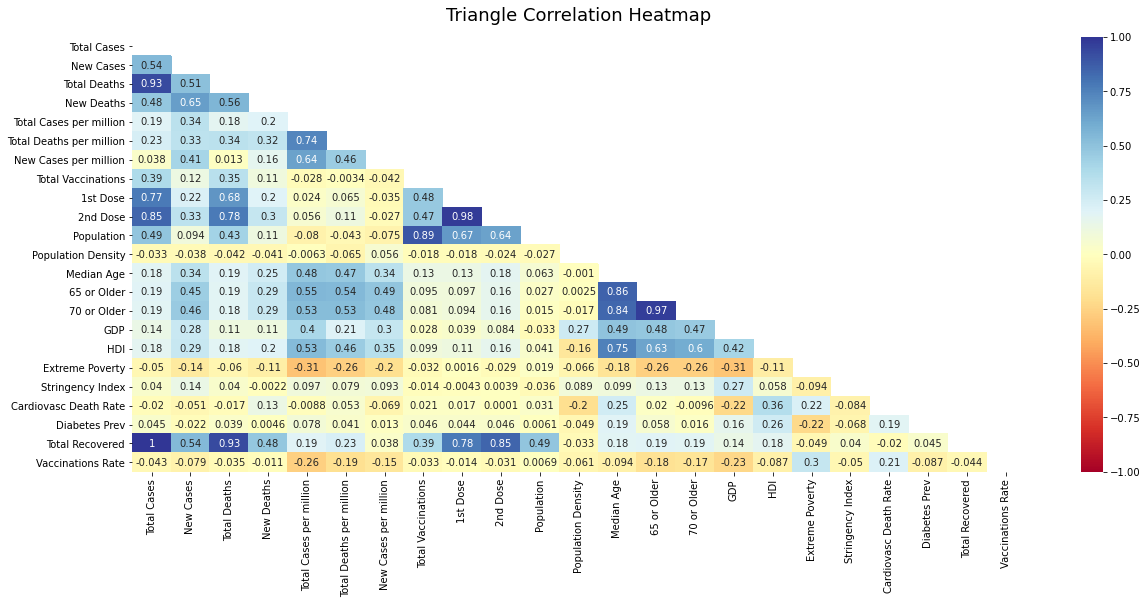

In [47]:
# matplot a heatmap to show relationships between variables
plt.figure(figsize=(20, 8))
mask = np.triu(np.ones_like(total_cases_corr.corr())) #define the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(total_cases_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdYlBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
heatmap

#### Observation:
- The correlation heatmap shows moderate to low degree of correlation between variables. The darker the colour the stronger the correlation is and vice versa. 
- It is worth exploring some variables such as Median Age, HDI and GDP vs Total Cases per million, Total Deaths per million and Vaccinations Rate.

### Scatter Plots Analysis

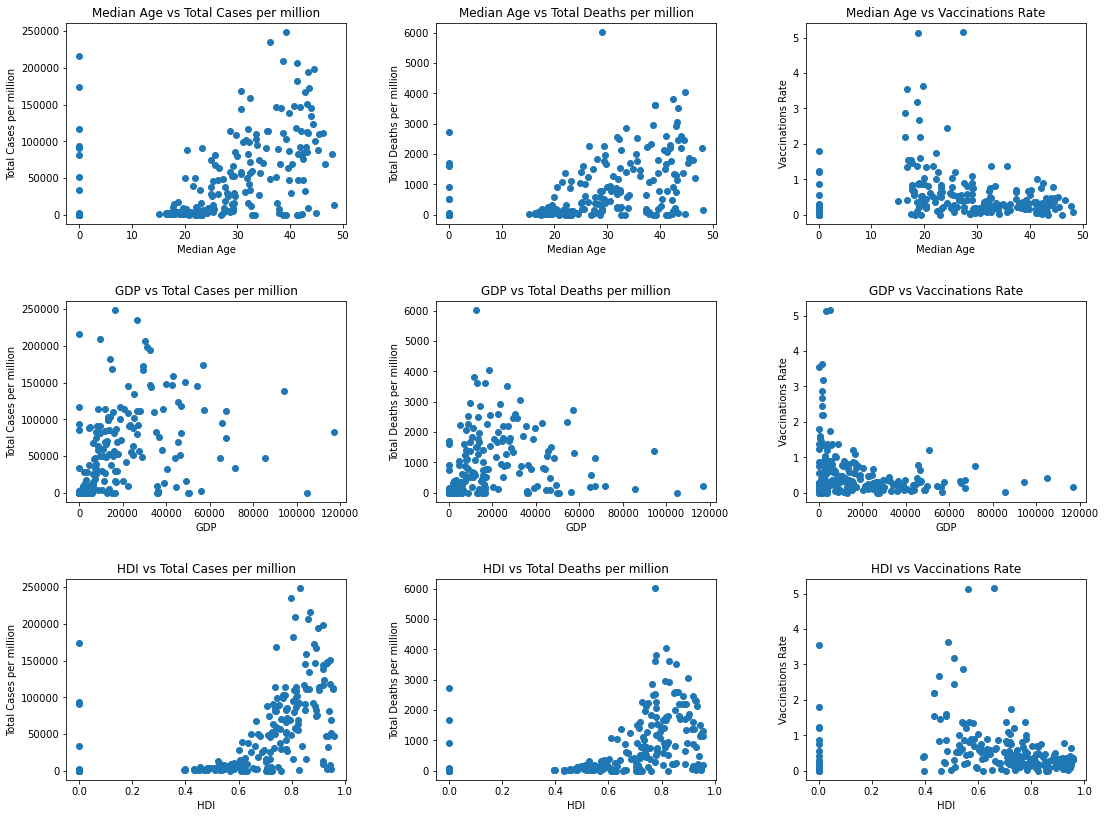

In [48]:
# Create scatter plots for IV and DV in 3x3 format
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(16,12))
                                        
ax1.scatter(total_cases_corr['Median Age'], total_cases_corr['Total Cases per million'])
ax1.title.set_text('Median Age vs Total Cases per million')
ax1.set_xlabel('Median Age')
ax1.set_ylabel('Total Cases per million')

ax2.scatter(total_cases_corr['Median Age'], total_cases_corr['Total Deaths per million'])
ax2.title.set_text('Median Age vs Total Deaths per million')
ax2.set_xlabel('Median Age')
ax2.set_ylabel('Total Deaths per million')

ax3.scatter(total_cases_corr['Median Age'], total_cases_corr['Vaccinations Rate'])
ax3.title.set_text('Median Age vs Vaccinations Rate')
ax3.set_xlabel('Median Age')
ax3.set_ylabel('Vaccinations Rate')

ax4.scatter(total_cases_corr['GDP'], total_cases_corr['Total Cases per million'])
ax4.title.set_text('GDP vs Total Cases per million')
ax4.set_xlabel('GDP')
ax4.set_ylabel('Total Cases per million')

ax5.scatter(total_cases_corr['GDP'], total_cases_corr['Total Deaths per million'])
ax5.title.set_text('GDP vs Total Deaths per million')
ax5.set_xlabel('GDP')
ax5.set_ylabel('Total Deaths per million')

ax6.scatter(total_cases_corr['GDP'], total_cases_corr['Vaccinations Rate'])
ax6.title.set_text('GDP vs Vaccinations Rate')
ax6.set_xlabel('GDP')
ax6.set_ylabel('Vaccinations Rate')

ax7.scatter(total_cases_corr['HDI'], total_cases_corr['Total Cases per million'])
ax7.title.set_text('HDI vs Total Cases per million')
ax7.set_xlabel('HDI')
ax7.set_ylabel('Total Cases per million')

ax8.scatter(total_cases_corr['HDI'], total_cases_corr['Total Deaths per million'])
ax8.title.set_text('HDI vs Total Deaths per million')
ax8.set_xlabel('HDI')
ax8.set_ylabel('Total Deaths per million')

ax9.scatter(total_cases_corr['HDI'], total_cases_corr['Vaccinations Rate'])
ax9.title.set_text('HDI vs Vaccinations Rate')
ax9.set_xlabel('HDI')
ax9.set_ylabel('Vaccinations Rate')


fig.tight_layout(pad=3) # to adj subplots params to fit the area
plt.show()

#### Observation:
The scatter plots used to observe the relationship between number of variables  of interest. For exmaple: 
- Median age vs Total cases and deaths per million shows moderate positive correlation where median age between 20-40 have higher rates of total cases and deaths recorded per million, whereas Median age vs Vaccinations plot was moderately negative.
- When looking at the Gross Domestic Product (GDP) relationships, we can observe an unclear due to scattered data but almost low positive relationship with total number of new cases er million, followed by total number of deaths per million where in countries with higher GDP the vaccinations rate is unexpectedly low.
- Furthermore, in observing the Human Development Index (HDI) relationships with total number of cases, deaths per million and vaccinations rate, we observe an unexpected result where countries with high HDI showed poor performance in dealing with Covid-19 and lower vaccinations rate compared to countries with lower HDI.

## Time-Series Analysis of Covid-19:  Australia vs Israel

### Overview

In [49]:
# plot total_stats first
Australia = total_stats('Australia')
Israel  = total_stats('Israel')

In [50]:
# Select a country for comparison 
Australia = plot_cumulative('Australia')

#### Observation
In Australia, the number of reported new cumulative Covid-19 cases was stable and low between November 2020 and July 2021. However, the number of new cases has shown an exponential growth where the growth has become rapidly fast over a short period of time between July 2021 and September 2021.

We can also observe the same exponential growth in the total number of cases, where the number of cumulative cases stayed stable between September 2020 - July 2021 and later started to grow very rapidly and it is too early to say if we have reached the peak. On the other hand, the mortality rete is significantly lower than last year. 

The vaccinations also showing a rapid growth in the number of 1st and 2nd dose vaccinations in Australia. This is important to note that upward and downward spikes in the vaccination charts, this variation can be indicative of daily reports not being recorded. This could occur for many reasons such as, data not sent and entered to the dataset due to falling on a weekend, or public holiday.

In [51]:
Israel  = plot_cumulative('Israel')

#### Observation
Israel has conducted the fastest campaign to vaccinate its population against COVID-19. In fact, over 60% of its population were fully vaccinated by July 2021. 
In analysing the line charts, we can observe that there has been a spike in new Covid-19 and new deaths despite high number of vaccinations in the population. As a result, Israel introduced a booster vaccine dose around August 2021 to try and restore protection from Covid-19 infection. We can also confirm this when looking at the daily vaccinations data which spiked around August in line with the booster shot spike around same the time. 
It will be interesting to monitor this progress to understand the impact of the booster dose and the level of protection it provides for future outbreaks. 

### =========================================================================================


## Conclusion

The aim of this project is to perform exploratory data analysis by analysing the data of countries effected by Covid-19.

#### (Q-1) The Delta variant of COVID-19 highly transmissible?
Overall data shows an upward trend and rapid increase of new cases which can be related to the new Covid-19 Delta variant and we can conclude that this variant can be 2x more transmissible than previous types and this is evident in the number of daily cases globally.
#### (Q-2) Does it result in more deaths compared to other variants?
On the positive side people are recovering as the rate of death from infection is very low and the numbers are also low compared to last year in 2020. It is still unclear if whether we can conclude that the Delta variant is less deadly and unlikely to cause severe illness. Awareness, hygiene, social distancing, lock downs and high vaccinations could perhaps contribute to drop in the number of deaths.  
#### (Q-3) What is the global trend of Covid-19 vaccinations?
With regards to the vaccinations we can observe that the countries worldwide are pushing towards achieving high percentage of full vaccinations of its population. This is to provide a level of protection against Covid-19 infection. Countries such as; Portugal, United Arab Emirates, Spain, Singapore and Chile are amongst the most vaccinated countries.
#### (Q-4) Is there any correlation between economic variables and the spread of Covid-19?
When examining relationships between economic variables we found that Median Age, HDI and GDP correlated with Total Cases per million, Total Deaths per million and Vaccinations Rate. This correlation was evident in a number of scatter plots showing various degrees of positive and negative correlations. Some unexpected correlations were evident in countries with higher GDP where the vaccinations rate is unexpectedly low and countries with high HDI showed poorer performance in dealing with Covid-19 and lower vaccinations rate compared to countries with lower HDI. 
#### (Q-5) What is the situation in Australia compared to countries with high vaccinations rate like Israel?
When observing time-series analysis, we looked at Australia and Israel. In Australia, the number of new cases is growing rapidly and very fast since July 2021 and over a short period of time, it is too early to say if we have reached the peak. While th rate of mortlity is signifcantly less than what it was 12 months ago. The vaccination rate is also showing a steady daily rate of vaccinations of ~1% and a rapid growth in the number of vaccinations.

In contrast, Israel has conducted the fastest campaign to vaccinate its population against COVID-19, however we observed a spike in new Covid-19 cases and new deaths since August 2021 despite high number of full vaccinations in the population. As a result, Israel introduced a booster vaccine dose to try and restore protection from Covid-19 infection. 

Finally, further analysis to investigate the vaccinations status of hospitalised patients and their health status i.e. whether they suffer from systemic and/or immunocompromised condition to better understand how vaccinations is protecting us from becoming severely ill.